In [1]:
import random
import pandas as pd
import numpy as np

random.seed(42)

num_days = 100
start_price = 100
volatility = 0.02

returns = np.random.normal(0, volatility, num_days)

stock_prices = [start_price]
for i in range(1, num_days):
    new_price = stock_prices[-1] * (1 + returns[i])
    stock_prices.append(new_price)

data = {
    'Date': pd.date_range(start='2023-01-01', periods=num_days, freq='D'),
    'Stock Price': stock_prices
}
df = pd.DataFrame(data)

print(df)


         Date  Stock Price
0  2023-01-01   100.000000
1  2023-01-02   100.404513
2  2023-01-03    99.821051
3  2023-01-04    99.588127
4  2023-01-05    99.822441
..        ...          ...
95 2023-04-06    97.463389
96 2023-04-07    96.292234
97 2023-04-08    96.910639
98 2023-04-09    98.749712
99 2023-04-10    97.986718

[100 rows x 2 columns]


In [2]:
import random
import pandas as pd
import numpy as np

random.seed(42)

num_days = 100
start_price = 100
volatility = 0.02

returns = np.random.normal(0, volatility, num_days)

stock_prices = [start_price]
for i in range(1, num_days):
    new_price = stock_prices[-1] * (1 + returns[i])
    stock_prices.append(new_price)

event_occurred = [random.choice([0, 1]) for _ in range(num_days)]

data = {
    'Date': pd.date_range(start='2023-01-01', periods=num_days, freq='D'),
    'Stock Price': stock_prices
}
df = pd.DataFrame(data)

positive_return_threshold = 0.01
negative_return_threshold = -0.01

event_mask = np.array(event_occurred) == 1

positive_returns = df['Stock Price'].pct_change() > positive_return_threshold
negative_returns = df['Stock Price'].pct_change() < negative_return_threshold

positive_return_given_event = len(positive_returns[event_mask & positive_returns]) / len(event_mask[event_mask])
negative_return_given_event = len(negative_returns[event_mask & negative_returns]) / len(event_mask[event_mask])

prior_event_probability = sum(event_occurred) / num_days
prior_no_event_probability = 1 - prior_event_probability

probability_up_given_event = positive_return_given_event * prior_event_probability / (
    positive_return_given_event * prior_event_probability + negative_return_given_event * prior_event_probability
)
probability_down_given_event = 1 - probability_up_given_event

print("Probability of the stock price going up given the event:", probability_up_given_event)
print("Probability of the stock price going down given the event:", probability_down_given_event)


Probability of the stock price going up given the event: 0.5555555555555555
Probability of the stock price going down given the event: 0.44444444444444453


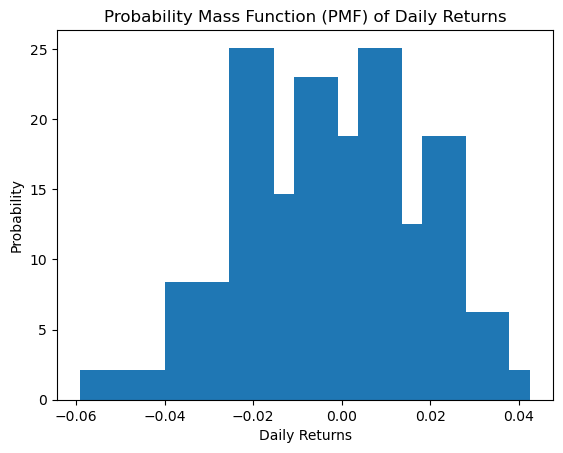

In [3]:
import matplotlib.pyplot as plt

returns = df['Stock Price'].pct_change().dropna()
pmf, bin_edges = np.histogram(returns, bins=20, density=True)

plt.bar(bin_edges[:-1], pmf, width=0.01)
plt.xlabel('Daily Returns')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of Daily Returns')
plt.show()

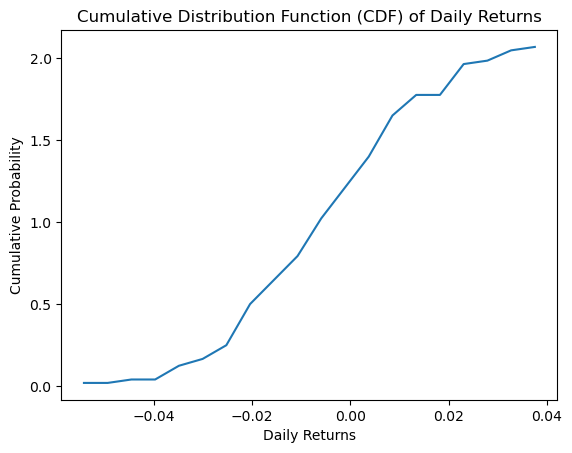

In [5]:

cdf = np.cumsum(pmf) * 0.01
plt.plot(bin_edges[:-1], cdf)
plt.xlabel('Daily Returns')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Daily Returns')
plt.show()

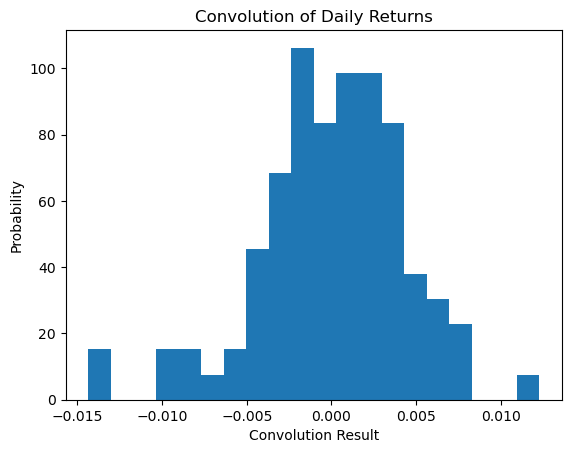

In [6]:
convolution_result = np.convolve(returns, returns, 'same')
plt.hist(convolution_result, bins=20, density=True)
plt.xlabel('Convolution Result')
plt.ylabel('Probability')
plt.title('Convolution of Daily Returns')
plt.show()

In [7]:
df['Daily Returns'] = df['Stock Price'].pct_change()

correlation = df['Daily Returns'].corr(pd.Series(event_occurred))
print("Correlation between Daily Returns and Event Indicator:", correlation)

covariance = df['Daily Returns'].cov(pd.Series(event_occurred))
print("Covariance between Daily Returns and Event Indicator:", covariance)

Correlation between Daily Returns and Event Indicator: 0.12378840863819496
Covariance between Daily Returns and Event Indicator: 0.0011555719844692064


In [9]:
from scipy.stats import bernoulli
p_increase = 0.6  
rv = bernoulli(p_increase)

outcome = rv.rvs()
print("Outcome of stock price increase (1) or decrease (0):", outcome)


Outcome of stock price increase (1) or decrease (0): 0


In [10]:
from scipy.stats import binom

n_trials = 7

p_increase = 0.6

k = 3  
probability = binom.pmf(k, n_trials, p_increase)
print("Probability of", k, "days with stock price increases in a week:", probability)


Probability of 3 days with stock price increases in a week: 0.19353599999999999


In [11]:
from scipy.stats import poisson

lambda_parameter = 10 
rv = poisson(lambda_parameter)

number_of_increases = rv.rvs()
print("Number of stock price increases in a month:", number_of_increases)

Number of stock price increases in a month: 8


In [12]:
from scipy.stats import geom

p_increase = 0.3  
rv = geom(p_increase)

number_of_days_until_increase = rv.rvs()
print("Number of days until the first stock price increase:", number_of_days_until_increase)


Number of days until the first stock price increase: 6


In [25]:
from scipy.stats import norm

mean = df['Stock Price'].pct_change().mean()
std_dev = df['Stock Price'].pct_change().std()

value = 0.01 

pdf = norm.pdf(value, loc=mean, scale=std_dev)

print("PDF of Daily Returns for the value", value, "is", pdf)


PDF of Daily Returns for the value 0.01 is 18.192459055843013


In [26]:
cdf = norm.cdf(value, loc=mean, scale=std_dev)
print("CDF of Daily Returns for the value", value, "is", cdf)

CDF of Daily Returns for the value 0.01 is 0.7140460525346173


In [27]:
from scipy.stats import uniform

a = 0
b = 1


pdf_uniform = uniform.pdf(value, loc=a, scale=b - a)
cdf_uniform = uniform.cdf(value, loc=a, scale=b - a)

print("PDF of Uniform Distribution for the value", value, "is", pdf_uniform)
print("CDF of Uniform Distribution for the value", value, "is", cdf_uniform)


PDF of Uniform Distribution for the value 0.01 is 1.0
CDF of Uniform Distribution for the value 0.01 is 0.01


In [28]:
z_score = (value - mean) / std_dev
print("Z-Score for the value", value, "is", z_score)

Z-Score for the value 0.01 is 0.5652438790925468


In [29]:
from scipy.stats import norm
probability = norm.cdf(z_score)
print("Probability for Z-Score", z_score, "in the Standard Normal Distribution is", probability)


Probability for Z-Score 0.5652438790925468 in the Standard Normal Distribution is 0.7140460525346173
